# Hands-on 3: Regression


## Fitting

As we approach the problem of regression in tha machine learning perspective, lets firsttry to gain intuition about how fitting curves to data work.

Lets take, to begin, the simple task of fitting data with polynomials of different order. Formally, this goes under the name of polynomial regression.



### Some theory on the prediction problem

Lets consider a series of mesurements that gives rise to data $(x,y)$. In the machine learning language, we say that $x$ are the *data points* and $y$ are the *labels*, so we call $(x,y)$ as *labeled data*. One can model the noise in those mesurements using
$$
    y_i= f(x_i) + \eta_i,
$$
where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable with average zero.

In a more physics-friendly language, this is equivalent to say that $x$ are the controll quantities (like setup pressure and temperature), while $y$ is the mesurable quantity (like the viscosity mesured in a fluid under that presure and temperature). $\eta_i$ is in nthis analogy the aleatory error associated with the mesurement $i$ (systemic error is inexistent or included as part o $f(x_i)$ when we define $<\eta_i>=0$). $f(x_i)$ is then the ground trouth behind the mesurements.

To build a interpolation, we consider a family of functions, lets say $g_\alpha(x,\theta_\alpha)$, that depend on some parameters $\theta_\alpha$. These functions respresent the class of models we are using to try to depict the $y_i$ and make predictions.

To learn the parameters $\boldsymbol{\theta}$, we will train our models on a subset of $(x,y)$ we call *training set* and then test the effectiveness of the model on a different subset, the *test set*. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

Our task is to model the data with polynomials and make predictions about the new data that we have not seen. We will consider two qualitatively distinct situations:

- In the first case, the process that generates the underlying data is in the model class we are using to make predictions. For polynomial regression, this means that the functions $f(x_i)$ are themselves polynomials.
- In the second case, our data lies outside our model class. In the case of polynomial regression, this could correspond to the case where the $f(x_i)$ is a 10-th order polynomial or an exponential, but $g_\alpha(x,\theta_\alpha)$ are polynomials of order 1 or 3.

In the exercises and discussion we consider 3 model classes:
- The case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 1 (linear models),
- The case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 3,
- The case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 10.

One common measure of predictive  performance of our algorithm is to compare the predictions,$y_j^\mathrm{pred}$, to the true values $y_j$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:

$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$


## Creating a dataset and fitting the data with a model using a simple regression

Python modules:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

We start for the true features by considering the case:

$$
f(x)=2x.
$$

Then the data is clearly generated by a model that is contained within all three model classes we are using to make predictions (linear models, third order polynomials, and tenth order polynomials).

The first exercise
<ul>
<li> Generate two datasets (size $N=10$ and $N=100$) with the random process described above using $\sigma=0.5$  
<li> in each case plot the dataset as scattered points as well as the reference function (true features)
<li> Perform a linear regression using linregress() of scipy.stats module. for the two datasets and discuss your results
<li> Perform a non-linear fitting with polynomials of order 3 and 10, making use of "curve_fit" module of oscipy.optimize: for the two datasets and discuss your results
<li> What if one applies the models outside the fitting range ? make some tests ?    
</ul>

###  First import the modules

In [16]:
#
# Import necessary modules
#
import numpy as np
import random
%matplotlib inline

from scipy import stats
from scipy.optimize import curve_fit

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score

from matplotlib import pyplot as plt

### Plot the model and its noisy representation as a training data

In [17]:
##########################
# functions
##########################

# define the noise
#
def gnoise(sigma, N):
    return sigma*np.random.randn(N)

#Define the fitting funtion
#
def fref(x):
    return 2*x

def func3(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def func10(x, a, b, c):
    return a*x**10 + b*x**5 + c*x


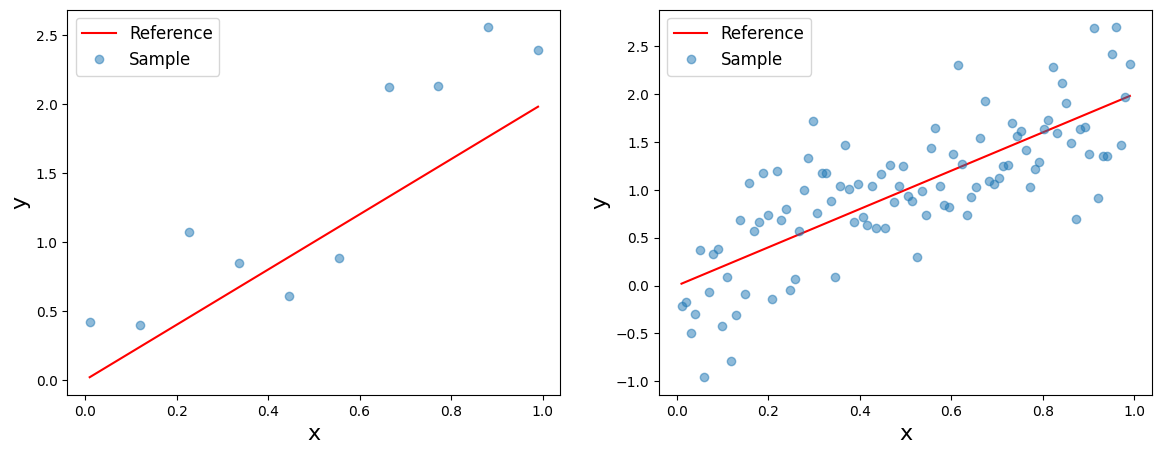

In [18]:
# Define The sample size and amplitude of the noise
N_sample=10
sigma_sample=0.5
x_min = 0
x_max = 1

# Set a random seed to ensure reproducibility during the test of the code
RNG_SEED = 171
np.random.seed(seed=RNG_SEED)

# discretize the x-axis in N_train points in a given interval
x_in_s10=np.linspace(x_min+0.01, x_max-0.01, N_sample)

# create the reference function
y_ref_s10 = fref(x_in_s10)
y_in_s10 = y_ref_s10 + gnoise(sigma_sample, N_sample)

# larger sample N =100
N_sample=100

# discretize the x-axis in N_train points in a given interval
x_in_s100=np.linspace(x_min+0.01, x_max-0.01, N_sample)

# create the reference function
y_ref_s100 = fref(x_in_s100)
y_in_s100 = y_ref_s100 + gnoise(sigma_sample, N_sample)

# Draw the reference function and with Gaussian random noise
figure, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,5))

ax1.plot(x_in_s10, y_ref_s10, color = 'red', label='Reference')
ax1.plot(x_in_s10, y_in_s10, "o", ms=6, alpha=0.5, label='Sample')
ax1.set_xlabel('x',fontsize = 16)
ax1.set_ylabel('y',fontsize = 16)
ax1.legend(fontsize=12)

ax2.plot(x_in_s100, y_ref_s100, color = 'red', label='Reference')
ax2.plot(x_in_s100, y_in_s100, "o", ms=6, alpha=0.5, label='Sample')
ax2.set_xlabel('x',fontsize = 16)
ax2.set_ylabel('y',fontsize = 16)
ax2.legend(fontsize=12)

plt.show()


N= 10 sample

Linear regression slope = 2.3490683664480887
Linear regression intercept = 0.16724476780596031
Linear regression r-value = 0.9037583222473985
Linear regression p-value = 0.00033371093617419516
Linear regression standard error in the gradient = 0.3933560675568491
N= 100 sample

Linear regression slope = 1.944079323652007
Linear regression intercept = 0.023015810204925824
Linear regression r-value = 0.7715572393471601
Linear regression p-value = 5.8135700225821836e-21
Linear regression standard error in the gradient = 0.16191947514333183


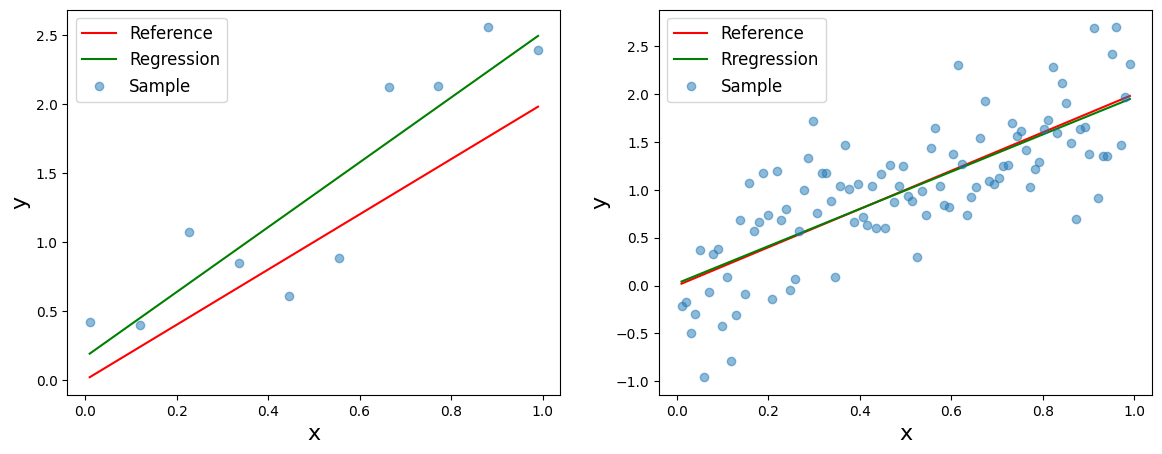

In [19]:
print('N= 10 sample\n')
result = stats.linregress(x_in_s10,y_in_s10)
a10, b10, r_value10, p_value10, std_err10 = result.slope,result.intercept,result.rvalue,result.pvalue,result.stderr
print('Linear regression slope =', a10)
print('Linear regression intercept =', b10)
print('Linear regression r-value =', r_value10)
print('Linear regression p-value =', p_value10)
print('Linear regression standard error in the gradient =', std_err10)

print('N= 100 sample\n')
result = stats.linregress(x_in_s100,y_in_s100)
a100, b100, r_value100, p_value100, std_err100 = result.slope,result.intercept,result.rvalue,result.pvalue,result.stderr
print('Linear regression slope =', a100)
print('Linear regression intercept =', b100)
print('Linear regression r-value =', r_value100)
print('Linear regression p-value =', p_value100)
print('Linear regression standard error in the gradient =', std_err100)

# Draw the reference function and with Gaussian random noise
figure, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,5))

ax1.plot(x_in_s10, y_ref_s10, color = 'red', label='Reference')
ax1.plot(x_in_s10, a10*x_in_s10+b10, color = 'green', label='Regression')
ax1.plot(x_in_s10, y_in_s10, "o", ms=6, alpha=0.5, label='Sample')
ax1.set_xlabel('x',fontsize = 16)
ax1.set_ylabel('y',fontsize = 16)
ax1.legend(fontsize=12)

ax2.plot(x_in_s100, y_ref_s100, color = 'red', label='Reference')
ax2.plot(x_in_s100, a100*x_in_s100+b100, color = 'green', label='Rregression')
ax2.plot(x_in_s100, y_in_s100, "o", ms=6, alpha=0.5, label='Sample')
ax2.set_xlabel('x',fontsize = 16)
ax2.set_ylabel('y',fontsize = 16)
ax2.legend(fontsize=12)

plt.show()

Fitting coefficients:  [-4.09815564  7.64912205 -1.51457922  0.55214499]
Covariance matrix: 
 [[ 30.97669502 -46.46504343  17.85180913  -1.18173044]
 [-46.46504343  71.84617959 -28.9263273    2.09957481]
 [ 17.85180913 -28.9263273   12.59962015  -1.08953016]
 [ -1.18173044   2.09957481  -1.08953016   0.1515518 ]]
Fitting coefficients:  [-2.53919608  2.71772025  2.11266862]
Covariance matrix: 
 [[ 3.98101396 -4.15335879  0.69360735]
 [-4.15335879  4.70127788 -0.90833076]
 [ 0.69360735 -0.90833076  0.2564626 ]]


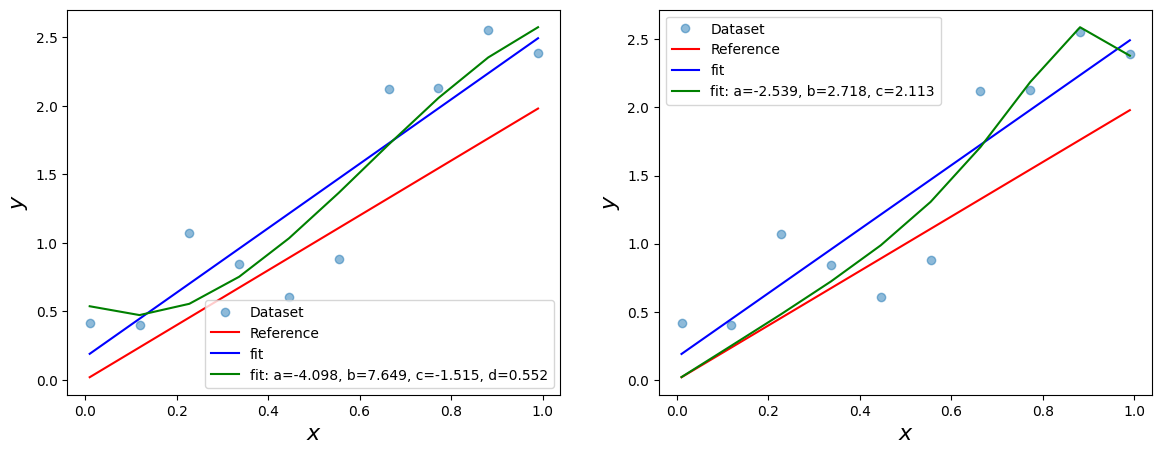

In [20]:
# non linear Regression

# Order 3
popt3, pcov3 = curve_fit(func3, x_in_s10, y_in_s10)
print('Fitting coefficients: ',popt3)
print('Covariance matrix: \n',pcov3)
# Order 10
popt10, pcov10 = curve_fit(func10, x_in_s10, y_in_s10)
print('Fitting coefficients: ',popt10)
print('Covariance matrix: \n',pcov10)


Figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax1.plot(x_in_s10,y_in_s10, "o",ms=6, alpha = 0.5, label='Dataset')
ax1.plot(x_in_s10, y_ref_s10, color = 'red', label='Reference')
ax1.plot(x_in_s10, a10*x_in_s10+b10, color = 'blue', label='fit')
ax1.plot(x_in_s10, func3(x_in_s10, *popt3), color = 'green', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt3))
ax1.set_xlabel(r'$x$', fontsize = 16)
ax1.set_ylabel(r'$y$', fontsize = 16)
ax1.legend(fontsize = 10)

ax2.plot(x_in_s10,y_in_s10, "o",ms=6, alpha = 0.5, label='Dataset')
ax2.plot(x_in_s10, y_ref_s10, color = 'red', label='Reference')
ax2.plot(x_in_s10, a10*x_in_s10+b10, color = 'blue', label='fit')
ax2.plot(x_in_s10, func10(x_in_s10, *popt10), color = 'green', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt10))
ax2.set_xlabel(r'$x$', fontsize = 16)
ax2.set_ylabel(r'$y$', fontsize = 16)
ax2.legend(fontsize = 10)
plt.show()

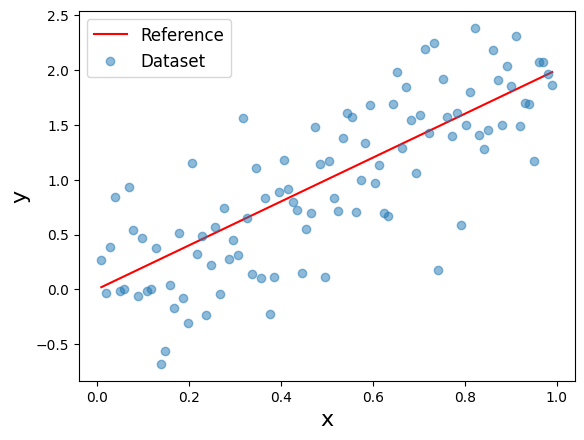

In [21]:
# Redo this for a sample size of 100 points
# Define The Training Data size and amplitude of the noise
N_sample_100=100
sigma_sample=0.5
x_min = 0
x_max = 1

# Set a random seed to ensure reproducibility during the test of the code
RNG_SEED = 42
np.random.seed(seed=RNG_SEED)

# discretize the x-axis in N_train points in a given interval

x_in_s100=np.linspace(x_min+0.01, x_max-0.01, N_sample_100)

# create the reference function
y_ref_s100 = fref(x_in_s100)
y_in_s100 = y_ref_s100 + gnoise(sigma_sample, N_sample_100)


# Draw the reference function and with Gaussian random noise

plt.plot(x_in_s100, y_ref_s100, color = 'red', label='Reference')
plt.plot(x_in_s100, y_in_s100, "o", ms=6, alpha=0.5, label='Dataset')
plt.xlabel('x',fontsize = 16)
plt.ylabel('y',fontsize = 16)
plt.legend(fontsize=12)
plt.show()

Linear regression slope = 2.070373812942126
Linear regression intercept = -0.0871101651681101
Linear regression r-value = 0.7950309282986755
Linear regression p-value = 5.303900068118632e-23
Linear regression standard error in the gradient = 0.15956286997456867


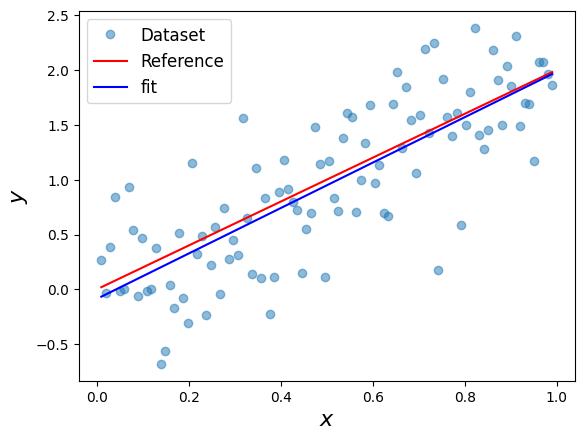

Fitting coefficients:  [-5.4209277   8.51301545 -1.58033672  0.25644754]
Covariance matrix: 
 [[ 5.99385556 -8.99078335  3.61459035 -0.30883129]
 [-8.99078335 13.86340961 -5.79912008  0.5267543 ]
 [ 3.61459035 -5.79912008  2.58164431 -0.26206467]
 [-0.30883129  0.5267543  -0.26206467  0.03477362]]
Fitting coefficients:  [-1.03882282  1.02533645  1.75649746]
Covariance matrix: 
 [[ 0.88312604 -0.77644964  0.11520721]
 [-0.77644964  0.75638406 -0.13224918]
 [ 0.11520721 -0.13224918  0.03432957]]


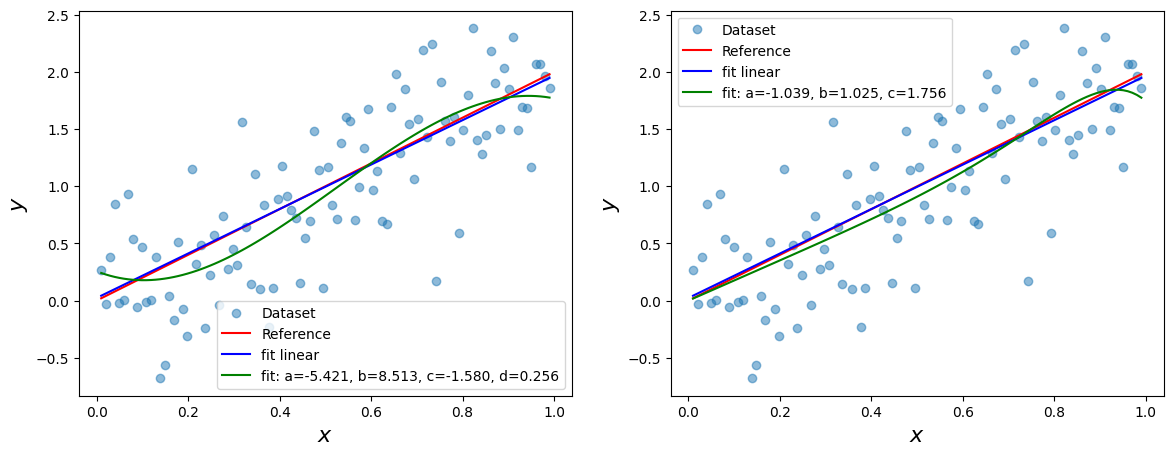

In [22]:
result = stats.linregress(x_in_s100,y_in_s100)
a, b, r_value, p_value, std_err = result.slope,result.intercept,result.rvalue,result.pvalue,result.stderr
print('Linear regression slope =', a)
print('Linear regression intercept =', b)
print('Linear regression r-value =', r_value)
print('Linear regression p-value =', p_value)
print('Linear regression standard error in the gradient =', std_err)

# Plot the result
xmin,xmax,ymin,ymax = 0.,10.0,0.,4.
plt.plot(x_in_s100,y_in_s100, "o",ms=6, alpha = 0.5, label='Dataset')
plt.plot(x_in_s100, y_ref_s100, color = 'red', label='Reference')
plt.plot(x_in_s100, a*x_in_s100+b, color = 'blue', label='fit')
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.legend(fontsize=12)
plt.show()

# non linear Regression

# Order 3
popt3, pcov3 = curve_fit(func3, x_in_s100, y_in_s100)
print('Fitting coefficients: ',popt3)
print('Covariance matrix: \n',pcov3)
# Order 10
popt10, pcov10 = curve_fit(func10, x_in_s100, y_in_s100)
print('Fitting coefficients: ',popt10)
print('Covariance matrix: \n',pcov10)


Figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax1.plot(x_in_s100,y_in_s100, "o",ms=6, alpha = 0.5, label='Dataset')
ax1.plot(x_in_s100, y_ref_s100, color = 'red', label='Reference')
ax1.plot(x_in_s100, a100*x_in_s100+b100, color = 'blue', label='fit linear')
ax1.plot(x_in_s100, func3(x_in_s100, *popt3), color = 'green', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt3))
ax1.set_xlabel(r'$x$', fontsize = 16)
ax1.set_ylabel(r'$y$', fontsize = 16)
ax1.legend(fontsize = 10)

ax2.plot(x_in_s100,y_in_s100, "o",ms=6, alpha = 0.5, label='Dataset')
ax2.plot(x_in_s100, y_ref_s100, color = 'red', label='Reference')
ax2.plot(x_in_s100, a100*x_in_s100+b100, color = 'blue', label='fit linear')
ax2.plot(x_in_s100, func10(x_in_s100, *popt10), color = 'green', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt10))
ax2.set_xlabel(r'$x$', fontsize = 16)
ax2.set_ylabel(r'$y$', fontsize = 16)
ax2.legend(fontsize = 10)
plt.show()

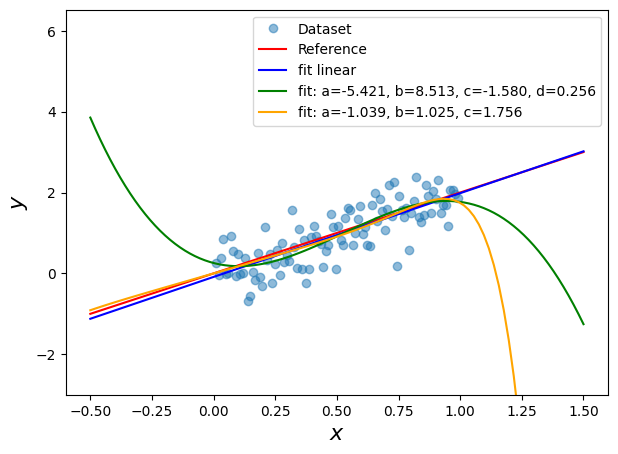

In [23]:
# extrapolation :

x_extra = np.linspace(x_min-0.5, x_max+0.5, N_sample)

Figure, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
ax1.plot(x_in_s100,y_in_s100, "o",ms=6, alpha = 0.5, label='Dataset')
ax1.plot(x_extra, 2*x_extra, color = 'red', label='Reference')
ax1.plot(x_extra, a*x_extra+b, color = 'blue', label='fit linear')
ax1.plot(x_extra, func3(x_extra, *popt3), color = 'green', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt3))
ax1.plot(x_extra, func10(x_extra, *popt10), color = 'orange', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt10))

ax1.set_ylim(ymin = -3)
ax1.set_xlabel(r'$x$', fontsize = 16)
ax1.set_ylabel(r'$y$', fontsize = 16)
ax1.legend(fontsize = 10)


## Fitting vs. predicting when the data is not in the model class

python module:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

Thus far, we have considered the case where the data is generated using a model contained in the model class. Now consider  $f(x)=2x-10x^5+15x^{10}$. *Notice that the for linear and third-order polynomial the true model $f(x)$ is not contained in model class $g_\alpha(x)$* .
Generally, the polynomial regression models of degree $n$ can be written as  

$$
y_i =  \beta_0+\beta_1x_i+\beta_2x^2_i+\cdots+\beta_nx^n_i+\varepsilon_i, \textrm{for } i = 1,\cdots, m,
$$

where $\varepsilon_i$ is the résidual error.  Interestingly, it is seen that these models are linear from the point of view of estimation, since the regression function is linear in terms of the unknown parameters $\beta_0$+$\beta_1$, $\cdots$ +$\beta_n$ as they can be expressed in the matrix form for $m<n$ points $\{ x_i,y_i\}$

$$
\begin{bmatrix}y_1\\ y_2 \\ \vdots \\ y_m \end{bmatrix}=\begin{bmatrix} 1 & x_1 & x^2_1 & \cdots & x^n_1 \\ 1 & x_2 & x^2_2 & \cdots & x^n_2 \\ \vdots &\vdots &\vdots &\ddots &\vdots \\ 1 & x_m & x^2_m & \cdots & x^n_m   \end{bmatrix}\begin{bmatrix}\beta_0\\ \beta_1\\ \vdots \\ \beta_m\end{bmatrix}+\begin{bmatrix}\varepsilon_1\\ \varepsilon_2\\ \vdots \\ \varepsilon_m\end{bmatrix}
$$

This is exactly what the module 'PolynomialFeatures' does *i.e.* tranforming a set of input points $x_i$ for a regresion of degree $n$, therefore creating $m$ feature vectors $\mathbf{X_i}$ of dimention $n+1$ in a matrix form (see the documentation).

<ul>
<li> Repeat the exercises above fitting and predicting for $f(x)=2x-10x^5+15x^{10}$ for $N_{\rm{train}}=10,100$ and $\sigma=0,3$. Record your observations.
<li> Do better fits lead to better predictions?
<li> What is the relationship between the true model for generating the data and the model class that has the most predictive power? How is this related to the model complexity? How does this depend on the number of data points $N_{\mathrm{train}}$ and $\sigma$?
<li> Summarize what you think you learned about the relationship of knowing the true model class and predictive power.

Dataset size:  200
train set size:  10
test set size:  190
__________________________
polynomial model degree 3
__________________________
coefficients: [  0.          29.67799592 -74.12304289  61.50457664]
train set size: 10
test set size: 190
Mean squared error E_out: 0.37674892
Coefficient of determination r2_out: 0.92964157
__________________________
polynomial model degree 10
__________________________
coefficients: [-2.00558045e+00 -4.50277198e+05  5.37662016e+06 -3.38238930e+07
  1.21711871e+08 -2.50549590e+08  2.56135156e+08 -9.61094411e+06
 -2.62542931e+08  2.51249960e+08 -7.76231717e+07]
train set size: 10
test set size: 190
Mean squared error E_out: 119505.40437466
Coefficient of determination r2_out: -22316.81536974


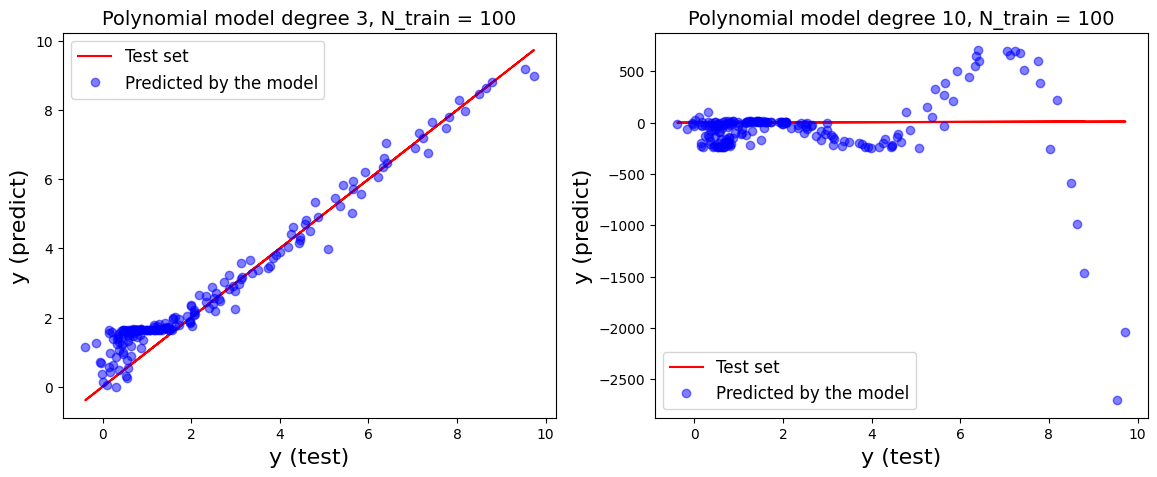

In [24]:
# create a sample with the new model.
RNG_SEED = 42
np.random.seed(seed=RNG_SEED)

N_sample = 300
sigma_sample = 0.3
x_min = 0
x_max = 1

x_sample=np.linspace(x_min-0.1, x_max+0.1, N_sample) # regular discretisation of the x values for the sample
y_ref_sample = func10(x_sample,5,10,2)
y_sample = y_ref_sample + gnoise(sigma_sample, N_sample)

# Create a dataset for train set and test set out of the sample with 200 elements
# so that we suppose that 100 point are unknown
N_data =  200

RNG_SEED = 142
np.random.seed(RNG_SEED)
ind = np.random.choice(range(50,250),size = N_data, replace = False)

x_data = x_sample[np.array(ind)]
y_data = y_sample[np.array(ind)]
print('Dataset size: ', len(y_data))

# Define the training set by picking up random N_train values in the (x_sample, y_sample) and the test set

N_train = 10

RNG_SEED = 242
random.seed(RNG_SEED)

ind_train = np.random.choice(range(200), size = N_train, replace = False) # Here the x domain is reduced for the train so that
                                              # so that we can observe extrapolation ability of the models
ind_test = np.array(list(i for i in range(200) if i not in ind_train)) #create the textset with remaining elements not in ind list


#pick up points in the indices' array
x_train = x_data[np.array(ind_train)]
y_train = y_data[np.array(ind_train)]
print('train set size: ', len(y_train))

#pick up points in the indices' array not in the train (very important to avoid bias in the testing
x_test = x_data[np.array(ind_test)]
y_test = y_data[np.array(ind_test)]
print('test set size: ', len(y_test))


# ---------------------------------------------
#create the polynomial model of degree 3
# ---------------------------------------------

poly3 = PolynomialFeatures(degree=3)

# Construct polynomial features
X3 = poly3.fit_transform(x_train[:,np.newaxis])

# Perform the training
clf3 = linear_model.LinearRegression()
trained_modelP3 = clf3.fit(X3,y_train)

#Predict on the whole sample
Xs=poly3.fit_transform(x_sample[:,np.newaxis])
y3_predict = trained_modelP3.predict(Xs)

print("__________________________")
print("polynomial model degree 3")
print("__________________________")
print('coefficients:', trained_modelP3.coef_)
print('train set size: {}'.format(len(y_train)))
print('test set size: {}'.format(len(y_test)))

Xt=poly3.fit_transform(x_test[:,np.newaxis])
y3_predict_test = trained_modelP3.predict(Xt)

# The mean squared error
print('Mean squared error E_out: %.8f'
      % mean_squared_error(y_test, y3_predict_test))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination r2_out: %.8f'
      % r2_score(y_test, y3_predict_test))

# Fifth order polynomial in case  you want to try it out
#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)


# ---------------------------------------------
#create the polynomial model of degree 10
# ---------------------------------------------

poly10 = PolynomialFeatures(degree=10)

# Construct polynomial features
X10 = poly10.fit_transform(x_train[:,np.newaxis])

# Perform the training
clf10 = linear_model.LinearRegression()
trained_modelP10 = clf10.fit(X10,y_train)

#Predict on the whole sample
Xs=poly10.fit_transform(x_sample[:,np.newaxis])
y10_predict = clf10.predict(Xs)

print("__________________________")
print("polynomial model degree 10")
print("__________________________")
print('coefficients:', trained_modelP10.coef_)
print('train set size: {}'.format(len(y_train)))
print('test set size: {}'.format(len(y_test)))

Xt=poly10.fit_transform(x_test[:,np.newaxis])
y10_predict_test = trained_modelP10.predict(Xt)

# The mean squared error
print('Mean squared error E_out: %.8f'
      % mean_squared_error(y_test, y10_predict_test))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination r2_out: %.8f'
      % r2_score(y_test, y10_predict_test))


figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax1.plot(y_test, y_test, color = 'red', label='Test set')
ax1.plot(y_test, y3_predict_test, "o", ms=6, color = 'blue', alpha = 0.5, label='Predicted by the model')

ax1.set_title('Polynomial model degree 3, N_train = 100', fontsize = 14)
ax1.set_xlabel('y (test)',fontsize = 16)
ax1.set_ylabel('y (predict)',fontsize = 16)
ax1.legend(fontsize=12)

ax2.plot(y_test, y_test, color = 'red', label='Test set')
ax2.plot(y_test, y10_predict_test, "o", ms=6, color = 'blue', alpha = 0.5, label='Predicted by the model')

ax2.set_title('Polynomial model degree 10, N_train = 100', fontsize = 14)
ax2.set_xlabel('y (test)',fontsize = 16)
ax2.set_ylabel('y (predict)',fontsize = 16)
ax2.legend(fontsize=12)
plt.show()

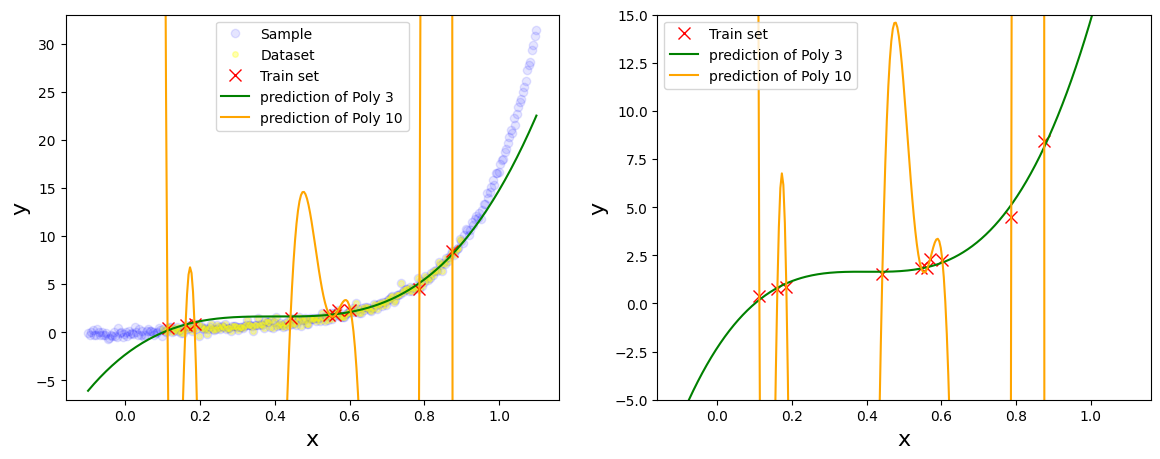

In [25]:
figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

ax1.plot(x_sample, y_sample, 'o', ms=6, color = 'blue', alpha = 0.1, label='Sample')
ax1.plot(x_data, y_data, 'o', ms=4, color = 'yellow', alpha = 0.3, label='Dataset')
ax1.plot(x_train, y_train, 'x', ms=8, color = 'red', alpha = 1, label='Train set')
ax1.plot(x_sample, y3_predict, color = 'green', label='prediction of Poly 3')
ax1.plot(x_sample, y10_predict, color = 'orange', label='prediction of Poly 10')

ax1.set_xlabel('x',fontsize = 16)
ax1.set_ylabel('y',fontsize = 16)
ax1.set_ylim(ymin=-7,ymax=33)
ax1.legend(fontsize=10)

ax2.plot(x_train, y_train, 'x', ms=8, color = 'red', alpha = 1, label='Train set')
ax2.plot(x_sample, y3_predict, color = 'green', label='prediction of Poly 3')
ax2.plot(x_sample, y10_predict, color = 'orange', label='prediction of Poly 10')

ax2.set_xlabel('x',fontsize = 16)
ax2.set_ylabel('y',fontsize = 16)
ax2.set_ylim(ymin=-5,ymax=15)
ax2.legend(fontsize=10)

plt.show()

Dataset size:  200
train set size:  100
test set size:  100
__________________________
polynomial model degree 3
__________________________
coefficients: [  0.          14.5267778  -39.13778495  39.43451554]
train set size: 100
test set size: 100
Mean squared error E_out: 0.09666167
Coefficient of determination r2_out: 0.97904825
__________________________
polynomial model degree 10
__________________________
coefficients: [ 0.00000000e+00 -7.54968510e+02  1.11374569e+04 -9.00236977e+04
  4.43749627e+05 -1.40101911e+06  2.88794013e+06 -3.86329427e+06
  3.23000600e+06 -1.53270226e+06  3.15012799e+05]
train set size: 100
test set size: 100
Mean squared error E_out: 0.09903065
Coefficient of determination r2_out: 0.97853477


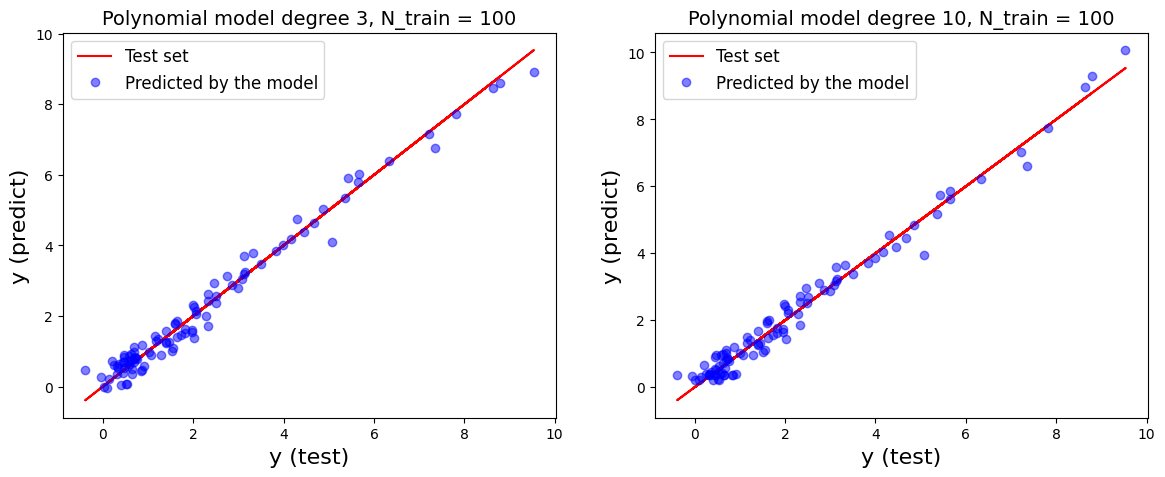

In [26]:
# Polynomial Regression larger sample

print('Dataset size: ', len(y_data))

# Define the training set by picking up random N_train values in the (x_sample, y_sample) and the test set

N_train = 100

RNG_SEED = 242
random.seed(RNG_SEED)

ind_train = np.random.choice(range(200), size = N_train, replace = False) # Here the x domain is reduced for the train so that
                                              # so that we can observe extrapolation ability of the models
ind_test = np.array(list(i for i in range(200) if i not in ind_train)) #create the textset with remaining elements not in ind list


#pick up points in the indices' array
x_train = x_data[np.array(ind_train)]
y_train = y_data[np.array(ind_train)]
print('train set size: ', len(y_train))

#pick up points in the indices' array not in the train (very important to avoid bias in the testing
x_test = x_data[np.array(ind_test)]
y_test = y_data[np.array(ind_test)]
print('test set size: ', len(y_test))


# ---------------------------------------------
#create the polynomial model of degree 3
# ---------------------------------------------

poly3 = PolynomialFeatures(degree=3)

# Construct polynomial features
X3 = poly3.fit_transform(x_train[:,np.newaxis])

# Perform the training
clf3 = linear_model.LinearRegression()
trained_modelP3 = clf3.fit(X3,y_train)

#Predict on the whole sample
Xs=poly3.fit_transform(x_sample[:,np.newaxis])
y3_predict = trained_modelP3.predict(Xs)

print("__________________________")
print("polynomial model degree 3")
print("__________________________")
print('coefficients:', trained_modelP3.coef_)
print('train set size: {}'.format(len(y_train)))
print('test set size: {}'.format(len(y_test)))

Xt=poly3.fit_transform(x_test[:,np.newaxis])
y3_predict_test = trained_modelP3.predict(Xt)

# The mean squared error
print('Mean squared error E_out: %.8f'
      % mean_squared_error(y_test, y3_predict_test))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination r2_out: %.8f'
      % r2_score(y_test, y3_predict_test))

# Fifth order polynomial in case  you want to try it out
#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)


# ---------------------------------------------
#create the polynomial model of degree 10
# ---------------------------------------------

poly10 = PolynomialFeatures(degree=10)

# Construct polynomial features
X10 = poly10.fit_transform(x_train[:,np.newaxis])

# Perform the training
clf10 = linear_model.LinearRegression()
trained_modelP10 = clf10.fit(X10,y_train)

#Predict on the whole sample
Xs=poly10.fit_transform(x_sample[:,np.newaxis])
y10_predict = clf10.predict(Xs)

print("__________________________")
print("polynomial model degree 10")
print("__________________________")
print('coefficients:', trained_modelP10.coef_)
print('train set size: {}'.format(len(y_train)))
print('test set size: {}'.format(len(y_test)))

Xt=poly10.fit_transform(x_test[:,np.newaxis])
y10_predict_test = trained_modelP10.predict(Xt)

# The mean squared error
print('Mean squared error E_out: %.8f'
      % mean_squared_error(y_test, y10_predict_test))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination r2_out: %.8f'
      % r2_score(y_test, y10_predict_test))


figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax1.plot(y_test, y_test, color = 'red', label='Test set')
ax1.plot(y_test, y3_predict_test, "o", ms=6, color = 'blue', alpha = 0.5, label='Predicted by the model')

ax1.set_title('Polynomial model degree 3, N_train = 100', fontsize = 14)
ax1.set_xlabel('y (test)',fontsize = 16)
ax1.set_ylabel('y (predict)',fontsize = 16)
ax1.legend(fontsize=12)

ax2.plot(y_test, y_test, color = 'red', label='Test set')
ax2.plot(y_test, y10_predict_test, "o", ms=6, color = 'blue', alpha = 0.5, label='Predicted by the model')

ax2.set_title('Polynomial model degree 10, N_train = 100', fontsize = 14)
ax2.set_xlabel('y (test)',fontsize = 16)
ax2.set_ylabel('y (predict)',fontsize = 16)
ax2.legend(fontsize=12)
plt.show()

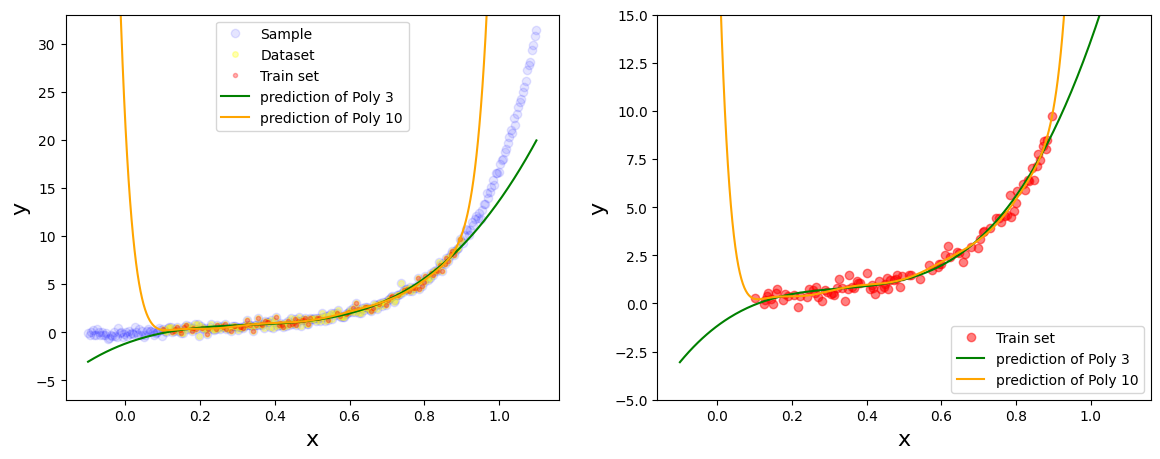

In [27]:
figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

ax1.plot(x_sample, y_sample, 'o', ms=6, color = 'blue', alpha = 0.1, label='Sample')
ax1.plot(x_data, y_data, 'o', ms=4, color = 'yellow', alpha = 0.3, label='Dataset')
ax1.plot(x_train, y_train, 'o', ms=3, color = 'red', alpha = 0.3, label='Train set')
ax1.plot(x_sample, y3_predict, color = 'green', label='prediction of Poly 3')
ax1.plot(x_sample, y10_predict, color = 'orange', label='prediction of Poly 10')

ax1.set_xlabel('x',fontsize = 16)
ax1.set_ylabel('y',fontsize = 16)
ax1.set_ylim(ymin=-7,ymax=33)
ax1.legend(fontsize=10)

ax2.plot(x_train, y_train, 'o', ms=6, color = 'red', alpha = 0.5, label='Train set')
ax2.plot(x_sample, y3_predict, color = 'green', label='prediction of Poly 3')
ax2.plot(x_sample, y10_predict, color = 'orange', label='prediction of Poly 10')

ax2.set_xlabel('x',fontsize = 16)
ax2.set_ylabel('y',fontsize = 16)
ax2.set_ylim(ymin=-5,ymax=15)
ax2.legend(fontsize=10)

plt.show()

## Regression with an Artificial Neural Network

Lets use the above exemple as a motivation to learn how to fit ANN to a given set of data...

ANN are universal generalizers...

We will use sklearn

In [28]:
# Re-creating a sample with the 10th degree polinomial above.
RNG_SEED = 171
np.random.seed(seed=RNG_SEED)

N_sample = 300
sigma_sample = 0.3
x_min = 0
x_max = 1

x_sample=np.linspace(x_min-0.1, x_max+0.1, N_sample) # regular discretisation of the x values for the sample
y_ref_sample = func10(x_sample,5,10,2)
y_sample = y_ref_sample + gnoise(sigma_sample, N_sample)

# Create a dataset for train set and test set out of the sample with 200 elements
# so that we suppose that 100 point are unknown
N_data =  200

RNG_SEED = 42
np.random.seed(RNG_SEED)
ind = np.random.choice(range(50,250),size = N_data, replace = False)

x_data = x_sample[np.array(ind)]
y_data = y_sample[np.array(ind)]
print('Dataset size: ', len(y_data))





Dataset size:  200


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


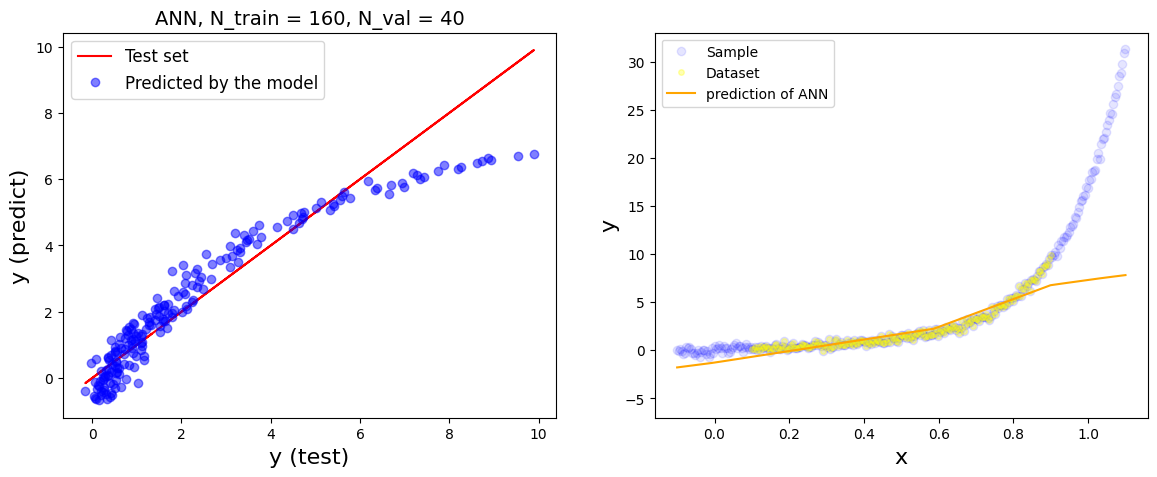

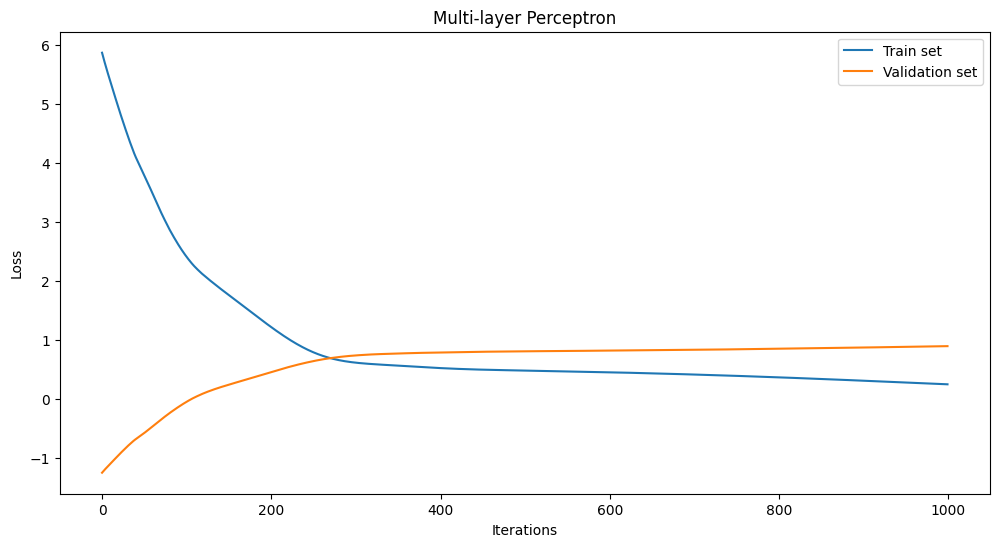

In [29]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor



################################################
#
ann = MLPRegressor(hidden_layer_sizes=(32,32), activation='relu', solver='adam', learning_rate='adaptive', max_iter=1000, early_stopping=True, validation_fraction=0.2)
ann.fit(x_data.reshape(-1, 1), y_data)
evol_loss = ann.loss_curve_
evol_val_loss = ann.validation_scores_
ypred_data = ann.predict(x_data.reshape(-1, 1))
ypred_samples = ann.predict(x_sample.reshape(-1, 1))



################################################
#
figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax1.plot(y_data, y_data, color = 'red', label='Test set')
ax1.plot(y_data, ypred_data, "o", ms=6, color = 'blue', alpha = 0.5, label='Predicted by the model')

ax1.set_title('ANN, N_train = 160, N_val = 40', fontsize = 14)
ax1.set_xlabel('y (test)',fontsize = 16)
ax1.set_ylabel('y (predict)',fontsize = 16)
ax1.legend(fontsize=12)

ax2.plot(x_sample, y_sample, 'o', ms=6, color = 'blue', alpha = 0.1, label='Sample')
ax2.plot(x_data, y_data, 'o', ms=4, color = 'yellow', alpha = 0.3, label='Dataset')
ax2.plot(x_sample, ypred_samples, color = 'orange', label='prediction of ANN')

ax2.set_xlabel('x',fontsize = 16)
ax2.set_ylabel('y',fontsize = 16)
ax2.set_ylim(ymin=-7,ymax=33)
ax2.legend(fontsize=10)

plt.show()

################################################
#
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
ax.plot(evol_loss,label="Train set")
ax.plot(evol_val_loss,label="Validation set")
ax.legend()
plt.show()


Dataset size:  200
train set size:  40
test set size:  160
Epoch 100, Loss: 4.9462, Val: 4.9462
Epoch 200, Loss: 0.7951, Val: 0.7951
Epoch 300, Loss: 0.4505, Val: 0.4505
Epoch 400, Loss: 0.3634, Val: 0.3634
Epoch 500, Loss: 0.3158, Val: 0.3158
Epoch 600, Loss: 0.2902, Val: 0.2902
Epoch 700, Loss: 0.2707, Val: 0.2707
Epoch 800, Loss: 0.2511, Val: 0.2511
Epoch 900, Loss: 0.2263, Val: 0.2263
Epoch 1000, Loss: 0.2130, Val: 0.2130


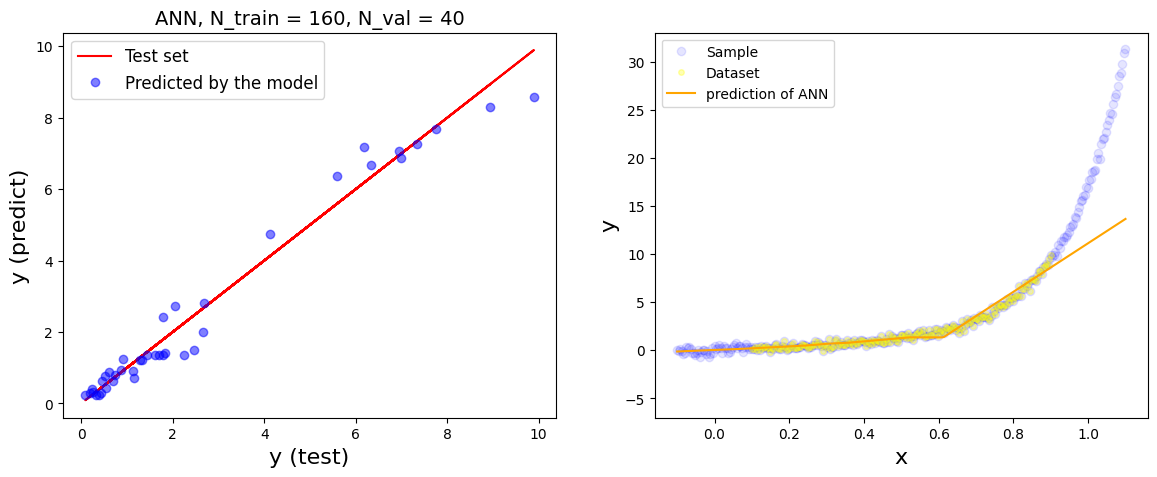

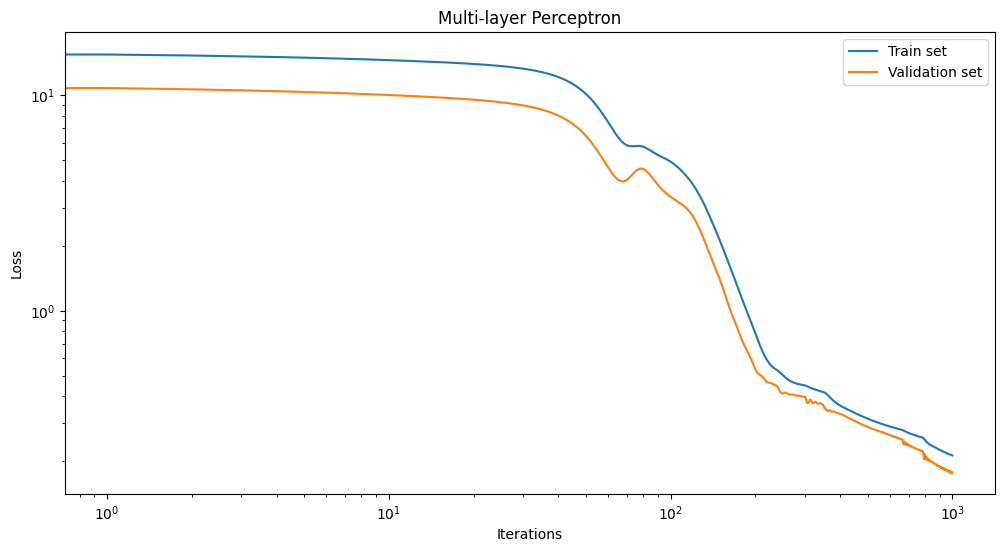

In [30]:
# Re-creating a sample with the 10th degree polinomial above.
RNG_SEED = 171
np.random.seed(seed=RNG_SEED)

N_sample = 300
sigma_sample = 0.3
x_min = 0
x_max = 1

x_sample=np.linspace(x_min-0.1, x_max+0.1, N_sample) # regular discretisation of the x values for the sample
y_ref_sample = func10(x_sample,5,10,2)
y_sample = y_ref_sample + gnoise(sigma_sample, N_sample)

# Create a dataset for train set and test set out of the sample with 200 elements
# so that we suppose that 100 point are unknown
N_data =  200

RNG_SEED = 42
np.random.seed(RNG_SEED)
ind = np.random.choice(range(50,250),size = N_data, replace = False)

x_data = x_sample[np.array(ind)]
y_data = y_sample[np.array(ind)]
print('Dataset size: ', len(y_data))


N_train = 40

RNG_SEED = 242
random.seed(RNG_SEED)

ind_train = np.random.choice(range(200), size = N_train, replace = False) # Here the x domain is reduced for the train so that
                                              # so that we can observe extrapolation ability of the models
ind_test = np.array(list(i for i in range(200) if i not in ind_train)) #create the textset with remaining elements not in ind list


#pick up points in the indices' array
x_train = x_data[np.array(ind_train)]
y_train = y_data[np.array(ind_train)]
print('train set size: ', len(y_train))

#pick up points in the indices' array not in the train (very important to avoid bias in the testing
x_test = x_data[np.array(ind_test)]
y_test = y_data[np.array(ind_test)]
print('test set size: ', len(y_test))

###########################################


import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Define the ANN model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create the ANN model
ann = ANN()

# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(ann.parameters(), lr=0.01)

# Convert the data to PyTorch tensors
x_data = torch.tensor(x_data.reshape(-1, 1), dtype=torch.float32)
y_data = torch.tensor(y_data.reshape(-1, 1), dtype=torch.float32)
x_train = torch.tensor(x_train.reshape(-1, 1), dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
x_test = torch.tensor(x_test.reshape(-1, 1), dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# Convert the data to PyTorch tensors
#x_data = x_data.reshape(-1, 1).clone().detach()
#y_data = y_data.reshape(-1, 1).clone().detach()
#x_train =x_train.reshape(-1, 1).clone().detach()
#y_train =y_train.reshape(-1, 1).clone().detach()
#x_test = x_test.reshape(-1, 1).clone().detach()
#y_test = y_test.reshape(-1, 1).clone().detach()


val_plot=[]
loss_plot=[]
# Train the ANN model
for epoch in range(1000):
    # Forward pass
    y_pred = ann(x_train)
    y_val = ann(x_test)

    # Compute the loss
    loss = loss_fn(y_pred, y_train)
    val = loss_fn(y_val, y_test)
    val_plot.append(val.item())
    loss_plot.append(loss.item())

    # Print the loss every 100 epochs
    if (epoch+1) % 100 == 0:
      print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}, Val: {loss.item():.4f}')


    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Convert the sample data to a PyTorch tensor
x_sample = torch.tensor(x_sample.reshape(-1, 1), dtype=torch.float32)
#x_sample = x_sample.reshape(-1, 1).clone().detach()


# Predict the output for the sample data
y_pred_samples = ann(x_sample)

# Plot the results
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(y_train, y_train, color='red', label='Test set')
ax1.plot(y_train, y_pred.detach().numpy(), "o", ms=6, color='blue', alpha=0.5, label='Predicted by the model')

ax1.set_title('ANN, N_train = 160, N_val = 40', fontsize=14)
ax1.set_xlabel('y (test)', fontsize=16)
ax1.set_ylabel('y (predict)', fontsize=16)
ax1.legend(fontsize=12)

ax2.plot(x_sample, y_sample, 'o', ms=6, color='blue', alpha=0.1, label='Sample')
ax2.plot(x_data, y_data, 'o', ms=4, color='yellow', alpha=0.3, label='Dataset')
ax2.plot(x_sample, y_pred_samples.detach().numpy(), color='orange', label='prediction of ANN')

ax2.set_xlabel('x', fontsize=16)
ax2.set_ylabel('y', fontsize=16)
ax2.set_ylim(ymin=-7, ymax=33)
ax2.legend(fontsize=10)

plt.show()

################################################
#
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(loss_plot,label="Train set")
ax.plot(val_plot,label="Validation set")
ax.legend()
plt.show()